# MarlimR3D - Model

Marlim R3D is a realistic resistivity model with corresponding controlled-source electromagnetic data. The model was created by Carvalho and Menezes (2017), and the resulting CSEM data, computed with *SBLwiz* from *EMGS*, was presented by Correa and Menezes (2019). Both model and CSEM data were released under the CC-BY 4.0 license and are available to download on Zenodo.

| Survey                                 |  Model                                 |
|:--------------------------------------:|:--------------------------------------:|
| ![Survey](survey.png "Survey")         | ![Model](model.png "Model")           |
| Figure 1 of Correa and Menezes (2019). | Figure 3 of Correa and Menezes (2019). |

- Caption of Figure 1: *«The CSEM acquisition geometry superimposed on the bathymetric map of the MR3D area. The Marlim reservoir outline is shown in the white line. The yellow dots are the receiver locations distributed in a 1000 m spacing regular grid. The black lines are the source towlines evenly spaced at 1000 m. Source locations are spaced every 100 m along each towline.»* 
- Caption of Figure 3: *«Figure 3. Cross section of the MR3D vertical resistivity along the east-west towline 04Tx013. Marlim oil-prone turbidites (M) appear as thin resistive bodies.»*


**We edited Figure 1 by marking in red the chosen inline and broadside acquisition lines, and indicating the chosen receiver by a red circle.**

### References

- **B. R. Carvalho and P. T. L. Menezes, 2017**, Marlim R3D: a realistic model
  for CSEM simulations - phase I: model building: Brazilian Journal of Geology,
  47, 633-644; DOI:
  [10.1590/2317-4889201720170088](https://doi.org/10.1590/2317-4889201720170088).
- **Correa, J. L. and P. T. L. Menezes, 2019**, Marlim R3D: A realistic model
  for controlled-source electromagnetic simulations - Phase 2: The
  controlled-source electromagnetic data set: Geophysics, 84(5), E293-E299;
  DOI: [10.1190/geo2018-0452.1](https://doi.org/10.1190/geo2018-0452.1).
- Fine Model;
  DOI: [10.5281/zenodo.400233](https://doi.org/10.5281/zenodo.400233)
- Computation Model (personal communication; TODO: ask for uploading it)
- With noise;
  DOI: [10.5281/zenodo.1256787](https://doi.org/10.5281/zenodo.1256787)
- Without noise;
  DOI: [10.5281/zenodo.1807135](https://doi.org/10.5281/zenodo.1807135)

In [1]:
import discretize
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# Model domain

## Load resistivity cubes

The create the data file you first have to run (once) the following code in the directory `model-marlim/.`:

```
import loadmarlim
loadmarlim.extract_model('orig')
```

For this to succeed you have to download the segy-files from [10.5281/zenodo.400233](https://doi.org/10.5281/zenodo.400233) and put them into a folder called `model-marlim/DATA/.`.

In [3]:
data_o = np.load('marlim_orig.npz')
res_h_o = data_o['res_h']
# res_v_o = data_o['res_v']

mesh_o = discretize.TensorMesh(
    [data_o['hx'], data_o['hy'], data_o['hz']], x0=data_o['x0'])
mesh_o

TensorMesh: 465,990,098 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x   1022    376,230.90    401,780.90     25.00     25.00    1.00
   y    371  7,504,190.00  7,532,015.00     75.00     75.00    1.00
   z   1229     -6,145.00          0.00      5.00      5.00    1.00

<IPython.core.display.Javascript object>


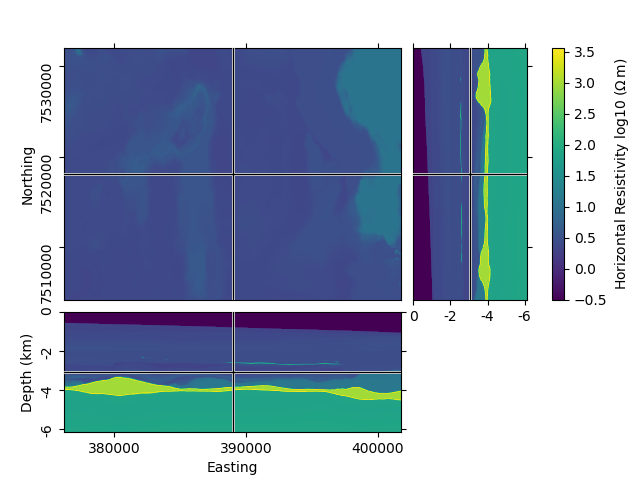

In [4]:
mesh_o.plot_3d_slicer(np.log10(res_h_o))

# Get principal figure axes
fig = plt.gcf()
axs = fig.get_children()

# Adjust the y-labels on the first subplot (XY)
plt.setp(axs[1].yaxis.get_majorticklabels(), rotation=90)
axs[1].set_yticks([7510000, 7520000, 7530000])
axs[1].set_ylabel('Northing')

# Adjust x- and y-labels on the second subplot (XZ)
axs[2].set_xticks([380000, 390000, 400000])
axs[2].set_xlabel('Easting')

plt.setp(axs[2].yaxis.get_majorticklabels(), rotation=90)
axs[2].set_yticks([0, -2000, -4000, -6000])
axs[2].set_yticklabels(['0', '-2', '-4', '-6'])
axs[2].set_ylabel('Depth (km)')

# Adjust x-labels on the third subplot (ZY)
axs[3].set_xticks([0, -2000, -4000, -6000])
axs[3].set_xticklabels(['0', '-2', '-4', '-6'])

# Adjust colorbar
axs[4].set_ylabel(r'Horizontal Resistivity log10 ($\Omega\,$m)')

# Ensure sufficient margins so nothing is clipped
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9)

# Computation domain

For author used a coarser grid for the actual computation of CSEM responses, that reaches far outside of the fine model above.

## Load resistivity cubes

The create the data file you first have to run (once) the following code in the directory `model-marlim/.`:

```
import loadmarlim
loadmarlim.extract_model('comp')
```

For this to succeed you have to download the segy-files from **?????????????????? (Ask them to make it publicly available; as of now obtained through personal communication)**) and put them into a folder called `model-marlim/DATA/.`.

In [5]:
data = np.load('marlim_comp.npz')
res_h = data['res_h']
# res_v = data['res_v']

mesh = discretize.TensorMesh(
    [data['hx'], data['hy'], data['hz']], x0=data['x0'])
mesh

TensorMesh: 89,882,950 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x    515    364,325.00    415,825.00    100.00    100.00    1.00
   y    563  7,490,049.00  7,546,349.00    100.00    100.00    1.00
   z    310     -6,200.00          0.00     20.00     20.00    1.00

<IPython.core.display.Javascript object>


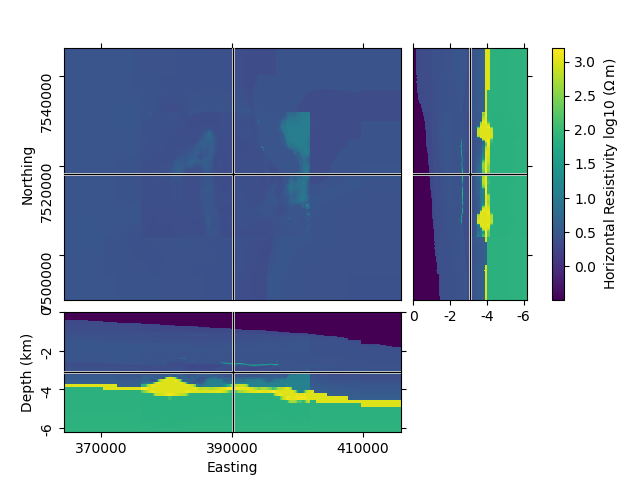

In [6]:
mesh.plot_3d_slicer(np.log10(res_h))

# Get principal figure axes
fig = plt.gcf()
axs = fig.get_children()

# Adjust the y-labels on the first subplot (XY)
plt.setp(axs[1].yaxis.get_majorticklabels(), rotation=90)
axs[1].set_yticks([7500000, 7520000, 7540000])
axs[1].set_ylabel('Northing')

# Adjust x- and y-labels on the second subplot (XZ)
axs[2].set_xticks([370000, 390000, 410000])
axs[2].set_xlabel('Easting')

plt.setp(axs[2].yaxis.get_majorticklabels(), rotation=90)
axs[2].set_yticks([0, -2000, -4000, -6000])
axs[2].set_yticklabels(['0', '-2', '-4', '-6'])
axs[2].set_ylabel('Depth (km)')

# Adjust x-labels on the third subplot (ZY)
axs[3].set_xticks([0, -2000, -4000, -6000])
axs[3].set_xticklabels(['0', '-2', '-4', '-6'])

# Adjust colorbar
axs[4].set_ylabel(r'Horizontal Resistivity log10 ($\Omega\,$m)')

# Ensure sufficient margins so nothing is clipped
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9)

# CSEM data


### Acquisition parameters

- 500 receivers located on the irregular seafloor.
- For each receiver, sources were located along 45 towlines with a spacing of 1 km; 25 east-west, 20 north-south;
- Source: azimuth and dip 0°, dipole length 278 m, dipole strength 1250 A, 50 m above sea floor.

For our comparison we choose the same receiver as shown in Correa and Menezes (2019), with the inline data and one broadside data.

## Load the two station from Correa and Menezes, 2019, GEO, Figure 4

The create the data file you first have to run (once) the following code in the directory `model-marlim/.`:

```
import loadmarlim
loadmarlim.create_survey(store_data=True')
```

For this to succeed you have to download the zip-file `EW_nonoise.zip` from [10.5281/zenodo.1807135](https://doi.org/10.5281/zenodo.1807135) and extract it in a folder called `model-marlim/DATA/.`.

In [7]:
data = xr.load_dataset('marlim_data.nc', engine='h5netcdf')
data

<xarray.Dataset>
Dimensions:     (components: 6, freqs: 6, src_x: 204)
Coordinates:
  * components  (components) object 'Ex' 'Ey' 'Ez' 'Hx' 'Hy' 'Hz'
  * freqs       (freqs) float32 0.125 0.25 0.5 0.75 1.0 1.25
  * src_x       (src_x) float32 379375.0 379475.0 379575.0 ... 401075.0 401175.0
Data variables:
    data_bs_im  (src_x, freqs, components) float32 6.783159e-15 ... -3.253886e-17
    data_bs_re  (src_x, freqs, components) float32 -1.003949e-14 ... 1.9154602e-16
    data_il_im  (src_x, freqs, components) float32 7.377131e-15 ... -6.436572e-17
    data_il_re  (src_x, freqs, components) float32 -1.0305979e-14 ... 1.1826384e-16
Attributes:
    rec_dip:    0.0
    rec_theta:  0.0
    rec_x:      390275.0
    rec_y:      7517812.0
    rec_z:      -849.7838
    src_dip:    0.0
    src_theta:  0.0
    strength:   1.0

## Plot survey

<IPython.core.display.Javascript object>


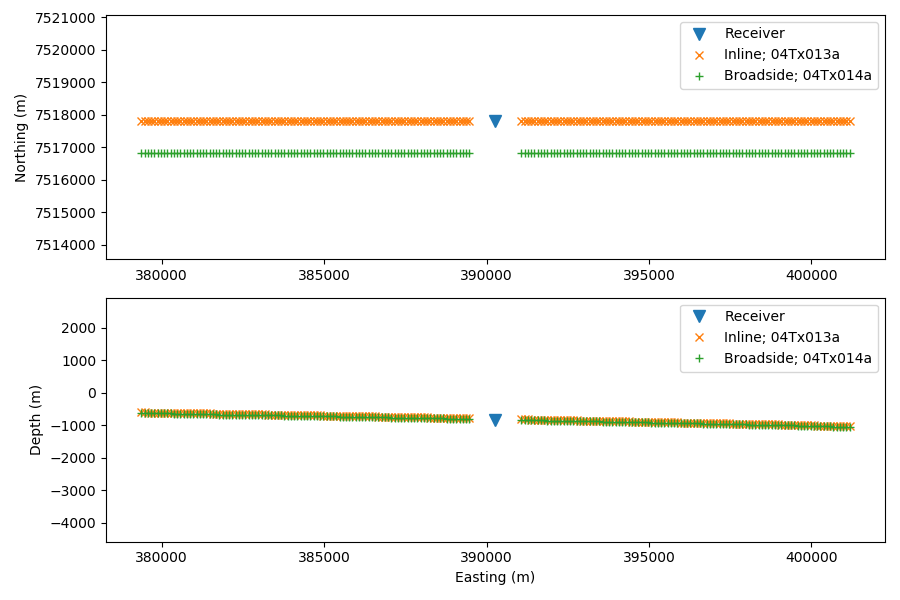

In [8]:
plt.figure(figsize=(9, 6))

ax1 = plt.subplot(211)
plt.plot(data.attrs['rec_x'], data.attrs['rec_y'], 'v', ms=8, label='Receiver')
plt.plot(data.src_x, np.ones(data.src_x.size)*data.data_il_re.attrs['src_y'],
         'x', label=f"Inline; {data.data_il_re.attrs['lineid']}")
plt.plot(data.src_x, np.ones(data.src_x.size)*data.data_bs_re.attrs['src_y'],
         '+', label=f"Broadside; {data.data_bs_re.attrs['lineid']}")
plt.legend()
plt.axis('equal')
plt.ylabel('Northing (m)')

plt.subplot(212, sharex=ax1)
plt.plot(data.attrs['rec_x'], data.attrs['rec_z'], 'v', ms=8, label='Receiver')
plt.plot(data.src_x, data.data_il_re.attrs['src_z'],
         'x', label=f"Inline; {data.data_il_re.attrs['lineid']}")
plt.plot(data.src_x, data.data_bs_re.attrs['src_z'],
         '+', label=f"Broadside; {data.data_bs_re.attrs['lineid']}")
plt.legend()
plt.axis('equal')
plt.xlabel('Easting (m)')
plt.ylabel('Depth (m)')

plt.tight_layout()
plt.show()

## Figure 4 from Correa and Menezes (2019), but noise-free data

<IPython.core.display.Javascript object>


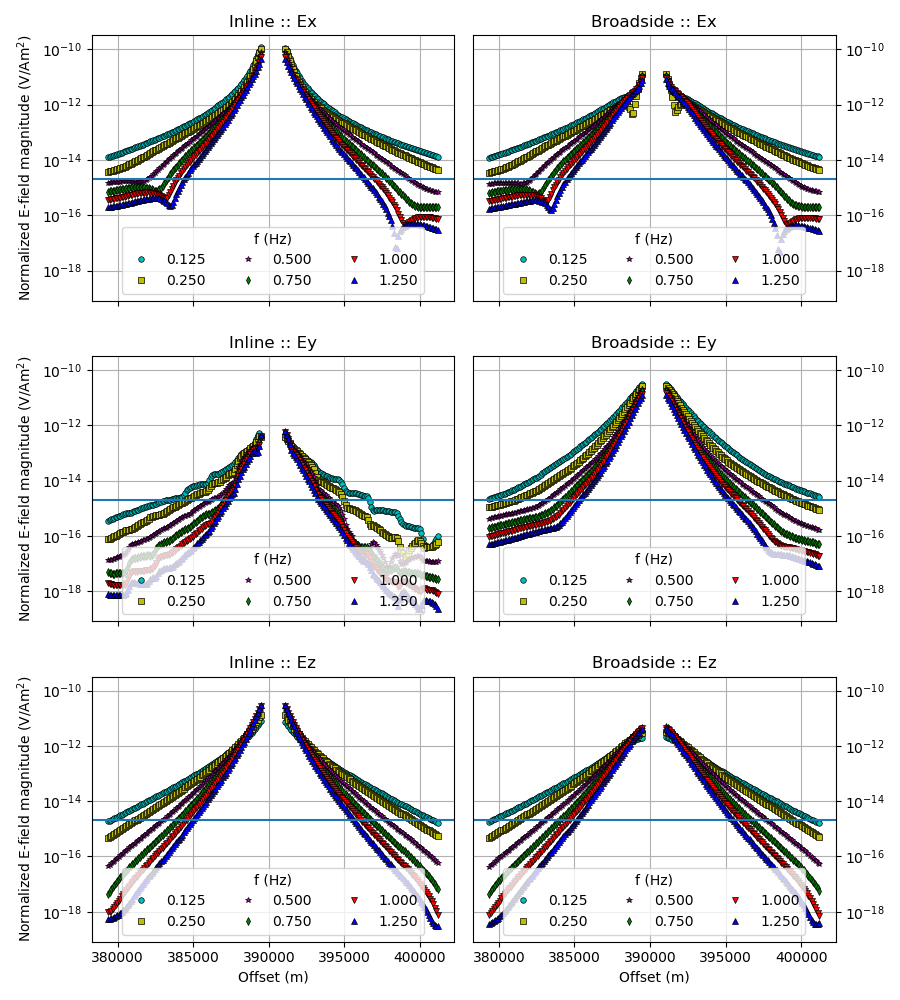

In [9]:
# Line styles
ls = ['co', 'ys', 'm*', 'gd', 'rv', 'b^']

fig, axs = plt.subplots(3, 2, figsize=(9, 10), sharex=True, sharey=True)

# Loop over Inline/Broadside
for iii, datname in enumerate(['data_il', 'data_bs']):

    # Take absolute value
    tdat = np.abs(getattr(data, datname+'_re') + 1j*getattr(data, datname+'_im'))

    # Loop over components Ex, Ey, Ez
    for ii, comp in enumerate(data.components.values[:3]):

        plt.sca(axs[ii, iii])
        plt.title(f"{['Inline', 'Broadside'][iii]} :: {comp}")

        # Loop over frequencies
        for i, freq in enumerate(data.freqs.values):

            # Plot this component/frequency
            plt.plot(data.src_x.values, tdat[:, i, ii],
                     ls[i], mec='k', mew=0.5, ms=4, label=f"{freq:4.3f}")

        plt.axhline(2e-15)
        plt.legend(title='f (Hz)', loc='lower center', ncol=3)
        plt.grid('on')
        plt.yscale('log')
        
        if ii == 2:
            plt.xlabel('Offset (m)')
        if iii == 0:
            plt.ylabel('Normalized E-field magnitude (V/Am$^2$)')
        else:
            axs[ii, iii].yaxis.set_ticks_position('right')
            axs[ii, iii].yaxis.set_label_position('right')

plt.tight_layout()
plt.show()

- **NOTE 1:** The noisy (not the clean) data is show in the paper, without amplitudes < 2e15 (blue lines) 
- **NOTE 2:** Subfigures (e) and (f) are switched in the paper, no idea why.

In [10]:
# Print Version Info (segyio is used in <loadmarlim.py>)
import scooby
scooby.Report([xr, 'scooby', discretize])

--------------------------------------------------------------------------------
  Date: Fri Mar 20 11:07:25 2020 CET

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.7.6 (default, Jan  8 2020, 19:59:22)  [GCC 7.3.0]

            xarray : 0.15.0
            scooby : 0.5.2
        discretize : 0.4.10
             numpy : 1.15.4
             scipy : 1.4.1
           IPython : 7.13.0
        matplotlib : 3.1.3
--------------------------------------------------------------------------------